# Import and prepare data

In [36]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import numpy as np
import statistics
import matplotlib
import os
import glob
import dask.dataframe as dd


In [37]:
#PHEROMONE

os.chdir("/Users/naroacorettisanchez/Documents/PHEROMONE_SIM/pheromone")

# Create an empty list to store the results
results_p = []

# Loop through each CSV file
for file_name in glob.glob('user/*.csv'):
    #print(file_name)

    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_name)

    # Extract the values from the second row of columns A, B, and C
    values = [df.iloc[1]['Num Bikes'], df.iloc[1]['Wandering Speed'], df.iloc[1]['Exploitation'],df.iloc[1]['Evaporation']]
        #['Num Bikes', 'Wandering Speed', 'Exploitation', 'Evaporation']
    # Calculate the average and median of column D
    avg = df['Wait Time (min)'].mean()
    median = df['Wait Time (min)'].median()

    #Compute average percentage of served trips
    count_served=df.loc[df['Trip Served']==True].shape[0]
    count_unserved=df.loc[df['Trip Served']==False].shape[0]
    average_served=(count_served)/(count_served+count_unserved)*100

    # Append the results to the list
    results_p.append(values + [avg, median, average_served])

# Create a pandas DataFrame from the results list
df_results_p = pd.DataFrame(results_p, columns=['Num Bikes', 'Wandering Speed', 'Exploitation', 'Evaporation', 'Avg Wait','Median','Avg Served'])


In [38]:
df_results_p

,Num Bikes,Wandering Speed,Exploitation,Evaporation,Avg Wait,Median,Avg Served
0,150.0,1.0,0.75,0.15,2.989456,2.400000,100.0
1,150.0,3.0,0.80,0.15,2.876583,2.283333,100.0
2,350.0,3.0,0.65,0.05,2.167419,1.466667,100.0
3,350.0,5.0,0.75,0.05,2.127640,1.533333,100.0
4,250.0,1.0,0.80,0.05,2.320203,1.733333,100.0
...,...,...,...,...,...,...,...
2498,350.0,3.0,0.65,0.05,2.223969,1.600000,100.0
2499,150.0,1.0,0.70,0.05,3.031645,2.433333,100.0
2500,150.0,5.0,0.70,0.05,2.851226,2.200000,100.0
2501,250.0,5.0,0.65,0.05,2.439661,1.833333,100.0


In [39]:
#PRE PROCESS to fix concatenated 


if False:

    # Loop through each CSV file
    for file_name in glob.glob('bike/*.csv'):
        # Load the concatenated csv file
        df = pd.read_csv(file_name)
        print(file_name)
        
    # Check if "Num Bikes" appears more than once in the first column
        if (df['Num Bikes']=='Num Bikes').any():
                
                # if (df.iloc[:, 0] == "Time").sum() == 1:
                print('hello')

                # Find the index of the row where the second csv starts
                second_csv_start_idx = df[df['Num Bikes']=='Num Bikes'].index[0]
                #second_csv_start_idx= df.loc[df['Num Bikes']=='Num Bikes'].index[1]
                #second_csv_start_idx = df[df.iloc[:, 0] == "Cycle"].index[1]

                # Split the concatenated csv into two dataframes
                first_csv = df.iloc[:second_csv_start_idx, :]
                second_csv = df.iloc[second_csv_start_idx:, :]

                # Save the two dataframes to separate csv files
                first_csv.to_csv(file_name.split('.')[0] + '_part1.csv', index=False)
                second_csv.to_csv(file_name.split('.')[0] + '_part2.csv', index=False)


#Now the first row is repeated twice
if False:

    # Loop through each CSV file
    for file_name in glob.glob('bike/*part2.csv'):
        # Load the concatenated csv file
        df = pd.read_csv(file_name)
        print(file_name)
        
    # Check if "Num Bikes" appears more than once in the first column
        if (df['Num Bikes']=='Num Bikes').any():
                

                df = df.drop(df.index[0])
                print(df.head(2))

                # Save csv
                df.to_csv( file_name, index=False)


In [40]:
# Create an empty list to store the results
results_p_b = []

# Loop through each CSV file
for file_name in glob.glob('bike/*.csv'):
    #print(file_name)

    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_name)

    #print(file_name)

    # Extract the values from the second row of columns A, B, and C
    values = [df.iloc[1]['Num Bikes'], df.iloc[1]['Wandering Speed'], df.iloc[1]['Exploitation'],df.iloc[1]['Evaporation']]
        #['Num Bikes', 'Wandering Speed', 'Exploitation', 'Evaporation']

    #Compute total distance in km
    dist=df['Distance Traveled'].sum()/1000


    # Append the results to the list
    results_p_b.append(values + [dist])

# Create a pandas DataFrame from the results list
df_results_p_b = pd.DataFrame(results_p_b, columns=['Num Bikes', 'Wandering Speed', 'Exploitation', 'Evaporation', 'Dist'])


In [41]:
df_results_p_b

,Num Bikes,Wandering Speed,Exploitation,Evaporation,Dist
0,350,1.0,0.70,0.20,9011.492765
1,250,3.0,0.60,0.15,18094.174514
2,250,5.0,0.75,0.10,29061.014563
3,250,1.0,0.65,0.10,7309.359246
4,250,5.0,0.75,0.10,29026.186259
...,...,...,...,...,...
2515,150,5.0,0.70,0.10,18030.986746
2516,250,1.0,0.75,0.10,7377.572540
2517,250,1.0,0.60,0.10,7368.706581
2518,350,3.0,0.75,0.15,24485.455012


In [42]:
df_results_p['Num Bikes'].value_counts()

150.0    855
250.0    853
350.0    795
Name: Num Bikes, dtype: int64

In [43]:
#NOMINAL

os.chdir("/Users/naroacorettisanchez/Documents/PHEROMONE_SIM/nominal3")

# Create an empty list to store the results
results_n = []

# Loop through each CSV file
for file_name in glob.glob('user/*.csv'):
    #print(file_name)

    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_name)

    # Extract the values from the second row of columns A, B, and C
    values = [df.iloc[1]['Num Bikes'], df.iloc[1]['Wandering Speed'], df.iloc[1]['Exploitation'],df.iloc[1]['Evaporation']]
        #['Num Bikes', 'Wandering Speed', 'Exploitation', 'Evaporation']

    # Calculate the average and median of column D
    avg = df['Wait Time (min)'].mean()
    median = df['Wait Time (min)'].median()

    #Compute average percentage of served trips
    count_served=df.loc[df['Trip Served']==True].shape[0]
    count_unserved=df.loc[df['Trip Served']==False].shape[0]
    average_served=(count_served)/(count_served+count_unserved)*100

    # Append the results to the list
    results_n.append(values + [avg, median, average_served])

# Create a pandas DataFrame from the results list
df_results_n = pd.DataFrame(results_n, columns=['Num Bikes', 'Wandering Speed', 'Exploitation', 'Evaporation', 'Avg Wait','Median','Avg Served'])


In [44]:
df_results_n['Num Bikes'].value_counts()

250    30
350    30
150    30
Name: Num Bikes, dtype: int64

In [45]:
os.chdir("/Users/naroacorettisanchez/Documents/PHEROMONE_SIM/nominal3")

# Create an empty list to store the results
results_n_b = []

# Loop through each CSV file
for file_name in glob.glob('bike/*.csv'):
    #print(file_name)

    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_name)

    print(file_name)

    # Extract the values from the second row of columns A, B, and C
    values = [df.iloc[1]['Num Bikes'], df.iloc[1]['Wandering Speed'], df.iloc[1]['Exploitation'],df.iloc[1]['Evaporation']]
        #['Num Bikes', 'Wandering Speed', 'Exploitation', 'Evaporation']

    #Compute total distance in km
    dist=df['Distance Traveled'].sum()/1000


    # Append the results to the list
    results_n_b.append(values + [dist])

# Create a pandas DataFrame from the results list
df_results_n_b = pd.DataFrame(results_n_b, columns=['Num Bikes', 'Wandering Speed', 'Exploitation', 'Evaporation', 'Dist'])

bike/bike_trip_event13_47_39.csv
bike/bike_trip_event22_28_40.csv
bike/bike_trip_event13_47_38.csv
bike/bike_trip_event13_46_50.csv
bike/bike_trip_event20_36_38.csv
bike/bike_trip_event14_38_8.csv
bike/bike_trip_event13_47_29.csv
bike/bike_trip_event14_38_13.csv
bike/bike_trip_event20_36_48.csv
bike/bike_trip_event22_28_37.csv
bike/bike_trip_event22_28_23.csv
bike/bike_trip_event14_37_56.csv
bike/bike_trip_event22_28_22.csv
bike/bike_trip_event22_28_36.csv
bike/bike_trip_event15_44_19.csv
bike/bike_trip_event15_44_25.csv
bike/bike_trip_event15_44_31.csv
bike/bike_trip_event20_36_49.csv
bike/bike_trip_event14_38_10.csv
bike/bike_trip_event21_24_28.csv
bike/bike_trip_event22_28_20.csv
bike/bike_trip_event22_28_34.csv
bike/bike_trip_event15_44_32.csv
bike/bike_trip_event15_44_26.csv
bike/bike_trip_event21_24_29.csv
bike/bike_trip_event14_38_11.csv
bike/bike_trip_event14_38_15.csv
bike/bike_trip_event15_44_22.csv
bike/bike_trip_event22_28_25.csv
bike/bike_trip_event22_28_31.csv
bike/bike_t

In [46]:
df_results_n_b


,Num Bikes,Wandering Speed,Exploitation,Evaporation,Dist
0,150,3.0,0.6,0.15,2889.394875
1,350,3.0,0.6,0.15,2705.109353
2,150,3.0,0.6,0.15,2867.720663
3,150,3.0,0.6,0.15,2887.308781
4,150,3.0,0.6,0.15,2859.679114
...,...,...,...,...,...
85,150,3.0,0.6,0.15,2906.373381
86,150,3.0,0.6,0.15,2884.726653
87,250,3.0,0.6,0.15,2771.940797
88,150,3.0,0.6,0.15,2899.091753


In [47]:
#RANDOM

os.chdir("/Users/naroacorettisanchez/Documents/PHEROMONE_SIM/random")

# Create an empty list to store the results
results_r = []

# Loop through each CSV file
for file_name in glob.glob('user/*.csv'):
    #print(file_name)

    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_name)

    # Extract the values from the second row of columns A, B, and C
    values = [df.iloc[1]['Num Bikes'], df.iloc[1]['Wandering Speed'], df.iloc[1]['Exploitation'],df.iloc[1]['Evaporation']]
        #['Num Bikes', 'Wandering Speed', 'Exploitation', 'Evaporation']
    # Calculate the average and median of column D
    avg = df['Wait Time (min)'].mean()
    median = df['Wait Time (min)'].median()

    #Compute average percentage of served trips
    count_served=df.loc[df['Trip Served']==True].shape[0]
    count_unserved=df.loc[df['Trip Served']==False].shape[0]
    average_served=(count_served)/(count_served+count_unserved)*100
    # Append the results to the list
    results_r.append(values + [avg, median, average_served])

# Create a pandas DataFrame from the results list
df_results_r = pd.DataFrame(results_r, columns=['Num Bikes', 'Wandering Speed', 'Exploitation', 'Evaporation', 'Avg Wait','Median','Avg Served'])



In [48]:
df_results_r

,Num Bikes,Wandering Speed,Exploitation,Evaporation,Avg Wait,Median,Avg Served
0,350,1.0,0.0,0.15,2.220367,1.633333,100.0
1,250,5.0,0.0,0.15,2.473181,1.900000,100.0
2,250,5.0,0.0,0.15,2.432642,1.900000,100.0
3,350,1.0,0.0,0.15,2.228626,1.600000,100.0
4,250,3.0,0.0,0.15,2.363331,1.766667,100.0
...,...,...,...,...,...,...,...
130,150,1.0,0.0,0.15,2.822414,2.233333,100.0
131,250,5.0,0.0,0.15,2.346142,1.733333,100.0
132,250,5.0,0.0,0.15,2.534143,2.000000,100.0
133,150,1.0,0.0,0.15,2.974104,2.366667,100.0


In [49]:
df_results_r['Num Bikes'].value_counts()

250    45
150    45
350    45
Name: Num Bikes, dtype: int64

In [50]:
os.chdir("/Users/naroacorettisanchez/Documents/PHEROMONE_SIM/random")

# Create an empty list to store the results
results_r_b = []

# Loop through each CSV file
for file_name in glob.glob('bike/*.csv'):
    #print(file_name)

    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_name)

    print(file_name)

    # Extract the values from the second row of columns A, B, and C
    values = [df.iloc[1]['Num Bikes'], df.iloc[1]['Wandering Speed'], df.iloc[1]['Exploitation'],df.iloc[1]['Evaporation']]
        #['Num Bikes', 'Wandering Speed', 'Exploitation', 'Evaporation']

    #Compute total distance in km
    dist=df['Distance Traveled'].sum()/1000


    # Append the results to the list
    results_r_b.append(values + [dist])

# Create a pandas DataFrame from the results list
df_results_r_b = pd.DataFrame(results_r_b, columns=['Num Bikes', 'Wandering Speed', 'Exploitation', 'Evaporation', 'Dist'])

bike/bike_trip_event13_50_2.csv
bike/bike_trip_event22_53_35.csv
bike/bike_trip_event22_53_21.csv
bike/bike_trip_event17_18_21.csv
bike/bike_trip_event14_43_11.csv
bike/bike_trip_event14_43_10.csv
bike/bike_trip_event20_49_13.csv
bike/bike_trip_event22_53_20.csv
bike/bike_trip_event22_53_34.csv
bike/bike_trip_event13_50_3.csv
bike/bike_trip_event22_53_22.csv
bike/bike_trip_event19_22_28.csv
bike/bike_trip_event17_18_22.csv
bike/bike_trip_event20_49_11.csv
bike/bike_trip_event17_18_36.csv
bike/bike_trip_event15_51_59.csv
bike/bike_trip_event14_43_13.csv
bike/bike_trip_event20_49_10.csv
bike/bike_trip_event17_18_23.csv
bike/bike_trip_event19_22_29.csv
bike/bike_trip_event13_50_0.csv
bike/bike_trip_event22_53_23.csv
bike/bike_trip_event19_22_39.csv
bike/bike_trip_event14_42_57.csv
bike/bike_trip_event22_53_27.csv
bike/bike_trip_event20_49_14.csv
bike/bike_trip_event17_18_27.csv
bike/bike_trip_event17_18_26.csv
bike/bike_trip_event20_49_15.csv
bike/bike_trip_event22_53_32.csv
bike/bike_tri

In [51]:
df_results_r_b

,Num Bikes,Wandering Speed,Exploitation,Evaporation,Dist
0,150,1.0,0.0,0.15,5653.124350
1,350,5.0,0.0,0.15,39906.909613
2,350,5.0,0.0,0.15,40030.528464
3,150,3.0,0.0,0.15,11887.904271
4,250,1.0,0.0,0.15,7442.104835
...,...,...,...,...,...
130,150,3.0,0.0,0.15,11906.958441
131,150,1.0,0.0,0.15,5593.635250
132,350,1.0,0.0,0.15,9047.528070
133,150,1.0,0.0,0.15,5618.512816


# Process matrices

In [52]:
n_bikes_possible=df_results_p['Num Bikes'].unique()
n_bikes_possible.sort()
print('Num Bikes: ',n_bikes_possible)

wander_speed_possible=df_results_p['Wandering Speed'].unique()
wander_speed_possible.sort()
print('Wandering Speed: ',wander_speed_possible)

evaporation_possible=df_results_p['Evaporation'].unique()
evaporation_possible.sort()
evaporation_possible = evaporation_possible[:-1]
print('Evaporation: ',evaporation_possible)

exploitation_possible=df_results_p['Exploitation'].unique()
exploitation_possible.sort()
print('Exploitation: ',exploitation_possible)

Num Bikes:  [150. 250. 350.]
Wandering Speed:  [1. 3. 5.]
Evaporation:  [0.05 0.1  0.15]
Exploitation:  [0.6  0.65 0.7  0.75 0.8 ]


In [53]:
#Set matrix sizes
i_size=n_bikes_possible.size
j_size=wander_speed_possible.size
k_size=evaporation_possible.size
l_size=exploitation_possible.size

In [54]:
#We have four variables in two axes i+j combined / k+l combined
x_size= i_size*j_size
y_size=k_size*l_size
print(x_size,y_size )

9 15


In [55]:
#Initialize matrices - Full size

#AVERAGE WAIT
wait_matrix_p=np.zeros((x_size,y_size))
wait_matrix_n=np.zeros((x_size,y_size))
wait_matrix_r=np.zeros((x_size,y_size))

wait_matrix_p_n=np.zeros((x_size,y_size))
wait_matrix_p_r=np.zeros((x_size,y_size))
wait_matrix_r_n=np.zeros((x_size,y_size))

#MEDIAN WAIT
waitm_matrix_p=np.zeros((x_size,y_size))
waitm_matrix_n=np.zeros((x_size,y_size))
waitm_matrix_r=np.zeros((x_size,y_size))

waitm_matrix_p_n=np.zeros((x_size,y_size))
waitm_matrix_p_r=np.zeros((x_size,y_size))
waitm_matrix_r_n=np.zeros((x_size,y_size))

#DISTANCES

dist_matrix_p=np.zeros((x_size,y_size))
dist_matrix_n=np.zeros((x_size,y_size))
dist_matrix_r=np.zeros((x_size,y_size))

dist_matrix_p_n=np.zeros((x_size,y_size))
dist_matrix_p_r=np.zeros((x_size,y_size))
dist_matrix_r_n=np.zeros((x_size,y_size))



In [56]:
# Loop to fill in the matrices 

u=-1

for i in range(i_size):

    for j in range(j_size):
        v=0
        u+=1
        for k in range(k_size):
            
            for l in range(l_size):

                #Read values and filter dataframe
                n_bikes=n_bikes_possible[i]
                wander_speed=wander_speed_possible[j]
                evaporation=evaporation_possible[k]
                exploitation=exploitation_possible[l]
                print(n_bikes,wander_speed,evaporation,exploitation)


                #PHEROMONES#
                #user trips data
                temp_p=df_results_p.loc[(df_results_p['Num Bikes']==n_bikes)&(df_results_p['Wandering Speed']==wander_speed)&(df_results_p['Evaporation']==evaporation)&(df_results_p['Exploitation']==exploitation)]
                #bike trips data
                temp_pb=df_results_p_b.loc[(df_results_p_b['Num Bikes']==n_bikes)&(df_results_p_b['Wandering Speed']==wander_speed)&(df_results_p_b['Evaporation']==evaporation)&(df_results_p_b['Exploitation']==exploitation)]
                
                #Compute aveage wait 
                sum=temp_p['Avg Wait'].sum()
                len=temp_p['Avg Wait'].size
                average_wait_p=sum/len

                #Compute median wait 
                sum=temp_p['Median'].sum()
                len=temp_p['Median'].size
                median_wait_p=sum/len

                #Compute distance
                sum=temp_pb['Dist'].sum()
                len=temp_pb['Dist'].size
                dist_p=sum/len


                #NOMINAL
                temp_n=df_results_n.loc[(df_results_n['Num Bikes']==n_bikes)]
                temp_nb=df_results_n_b.loc[(df_results_n_b['Num Bikes']==n_bikes)]

                #Compute aveage wait 
                sum=temp_n['Avg Wait'].sum()
                len=temp_n['Avg Wait'].size
                average_wait_n=sum/len

                #Compute median wait 
                sum=temp_n['Median'].sum()
                len=temp_n['Median'].size
                median_wait_n=sum/len

                #Compute distance
                sum=temp_nb['Dist'].sum()
                len=temp_nb['Dist'].size
                dist_n=sum/len
                print(len)

                #RANDOM
                temp_r=df_results_r.loc[(df_results_r['Num Bikes']==n_bikes)&(df_results_r['Wandering Speed']==wander_speed)]
                temp_rb=df_results_r_b.loc[(df_results_r_b['Num Bikes']==n_bikes)&(df_results_r_b['Wandering Speed']==wander_speed)]

                #Compute aveage wait 
                sum=temp_r['Avg Wait'].sum()
                len=temp_r['Avg Wait'].size
                average_wait_r=sum/len

                #Compute median wait 
                sum=temp_r['Median'].sum()
                len=temp_r['Median'].size
                median_wait_r=sum/len

                #Compute distance
                sum=temp_rb['Dist'].sum()
                len=temp_rb['Dist'].size
                dist_r=sum/len
                

                #SAVE DATA
                wait_matrix_p[u,v]=average_wait_p
                wait_matrix_n[u,v]=average_wait_n 
                wait_matrix_r[u,v]=average_wait_r

                wait_matrix_p_n[u,v]=(average_wait_p - average_wait_n)/average_wait_n*100
                wait_matrix_p_r[u,v]=(average_wait_p - average_wait_r)/average_wait_r*100 
                wait_matrix_r_n[u,v]=(average_wait_r - average_wait_n)/average_wait_n*100

                waitm_matrix_p[u,v]=median_wait_p
                waitm_matrix_n[u,v]=median_wait_n 
                wait_matrix_r[u,v]=median_wait_r

                waitm_matrix_p_n[u,v]=(median_wait_p - median_wait_n)/median_wait_n*100
                waitm_matrix_p_r[u,v]=(median_wait_p - median_wait_r)/median_wait_r*100 
                waitm_matrix_r_n[u,v]=(median_wait_r - median_wait_n)/median_wait_n*100

                dist_matrix_p[u,v]= dist_p
                dist_matrix_r[u,v]= dist_r
                dist_matrix_n[u,v]= dist_n
                dist_matrix_p_r[u,v]=(dist_p-dist_r)/dist_r*100
                dist_matrix_p_n[u,v]=(dist_p-dist_n)/dist_n*100
                dist_matrix_r_n[u,v]=(dist_r-dist_n)/dist_n*100
                
                v+=1


150.0 1.0 0.05 0.6
30
150.0 1.0 0.05 0.65
30
150.0 1.0 0.05 0.7
30
150.0 1.0 0.05 0.75
30
150.0 1.0 0.05 0.8
30
150.0 1.0 0.1 0.6
30
150.0 1.0 0.1 0.65
30
150.0 1.0 0.1 0.7
30
150.0 1.0 0.1 0.75
30
150.0 1.0 0.1 0.8
30
150.0 1.0 0.15 0.6
30
150.0 1.0 0.15 0.65
30
150.0 1.0 0.15 0.7
30
150.0 1.0 0.15 0.75
30
150.0 1.0 0.15 0.8
30
150.0 3.0 0.05 0.6
30
150.0 3.0 0.05 0.65
30
150.0 3.0 0.05 0.7
30
150.0 3.0 0.05 0.75
30
150.0 3.0 0.05 0.8
30
150.0 3.0 0.1 0.6
30
150.0 3.0 0.1 0.65
30
150.0 3.0 0.1 0.7
30
150.0 3.0 0.1 0.75
30
150.0 3.0 0.1 0.8
30
150.0 3.0 0.15 0.6
30
150.0 3.0 0.15 0.65
30
150.0 3.0 0.15 0.7
30
150.0 3.0 0.15 0.75
30
150.0 3.0 0.15 0.8
30
150.0 5.0 0.05 0.6
30
150.0 5.0 0.05 0.65
30
150.0 5.0 0.05 0.7
30
150.0 5.0 0.05 0.75
30
150.0 5.0 0.05 0.8
30
150.0 5.0 0.1 0.6
30
150.0 5.0 0.1 0.65
30
150.0 5.0 0.1 0.7
30
150.0 5.0 0.1 0.75
30
150.0 5.0 0.1 0.8
30
150.0 5.0 0.15 0.6
30
150.0 5.0 0.15 0.65
30
150.0 5.0 0.15 0.7
30
150.0 5.0 0.15 0.75
30
150.0 5.0 0.15 0.8
30
250.0 1

# All plots

In [57]:
#Process the labels for the combined axis
labels_1= []
for i in range(i_size):
    for j in range(j_size):
        labels_1.append([n_bikes_possible[i],wander_speed_possible[j]])

labels_2 =[]

for k in range(k_size):
    for l in range(l_size):
        labels_2.append([evaporation_possible[k],exploitation_possible[l]])

#Create grid
yi = np.arange(0, x_size+1) #shift x and y
xi = np.arange(0, y_size+1)
X, Y = np.meshgrid(xi, yi)

In [64]:
#Create color maps
import matplotlib as mpl

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

#P-color palettes
wait_max=wait_matrix_p.max()
wait_min=wait_matrix_p.min()
#served_max=served_matrix_p.max()
#served_min=served_matrix_p.min()
m= 1-(wait_max/(wait_max+abs(wait_min)))
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_wait_p = shiftedColorMap(orig_cmap, midpoint=m)
#m= 1-(served_max/(served_max+abs(served_min)))
#orig_cmap = matplotlib.cm.coolwarm_r
#shifted_cmap_served_p = shiftedColorMap(orig_cmap, midpoint=m)

#N-color palettes
wait_max=wait_matrix_n.max()
wait_min=wait_matrix_n.min()
#served_max=served_matrix_n.max()
#served_min=served_matrix_n.min()
m= 1-(wait_max/(wait_max+abs(wait_min)))
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_wait_n = shiftedColorMap(orig_cmap, midpoint=m)
#m= 1-(served_max/(served_max+abs(served_min)))
#orig_cmap = matplotlib.cm.coolwarm_r
#shifted_cmap_served_n = shiftedColorMap(orig_cmap, midpoint=m)

#R-color palettes
wait_max=wait_matrix_r.max()
wait_min=wait_matrix_r.min()
#served_max=served_matrix_r.max()
#served_min=served_matrix_r.min()
m= 1-(wait_max/(wait_max+abs(wait_min)))
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_wait_r = shiftedColorMap(orig_cmap, midpoint=m)
#m= 1-(served_max/(served_max+abs(served_min)))
#orig_cmap = matplotlib.cm.coolwarm_r
#shifted_cmap_served_r = shiftedColorMap(orig_cmap, midpoint=m)

#P-N-color palettes
wait_max=wait_matrix_p_n.max()
wait_min=wait_matrix_p_n.min()
#wait2_max=wait2_matrix_p_n.max()
#wait2_min=wait2_matrix_p_n.min()
#served_max=served_matrix_p_n.max()
#served_min=served_matrix_p_n.min()
m= 1-(wait_max)/(wait_max+abs(wait_min))
##m2= 1-(wait2_max/(wait2_max+abs(wait2_min)))
print('pn:', wait_max, wait_min, m)
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_wait_p_n = shiftedColorMap(orig_cmap, midpoint= m)
#shifted_cmap_wait2_p_n = shiftedColorMap(orig_cmap, midpoint=m2)
#m= 1-(served_max/(served_max+abs(served_min)))
#orig_cmap = matplotlib.cm.coolwarm_r
#shifted_cmap_served_p_n = shiftedColorMap(orig_cmap, midpoint=m)

#P-R-color palettes
wait_max=wait_matrix_p_r.max()
wait_min=wait_matrix_p_r.min()
#wait2_max=wait2_matrix_p_r.max()
#wait2_min=wait2_matrix_p_r.min()
#served_max=served_matrix_p_r.max()
#served_min=served_matrix_p_r.min()
m= 1-(wait_max/(wait_max+abs(wait_min)))
#m2= 1-(wait2_max/(wait2_max+abs(wait2_min)))
print('pr:', wait_max, wait_min, m)
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_wait_p_r = shiftedColorMap(orig_cmap, midpoint=m)
#shifted_cmap_wait2_p_r = shiftedColorMap(orig_cmap, midpoint=m2)
#m= 1-(served_max/(served_max+abs(served_min)))
#orig_cmap = matplotlib.cm.coolwarm_r
#shifted_cmap_served_p_r = shiftedColorMap(orig_cmap, midpoint=m)

#R-N-color palettes
wait_max=wait_matrix_r_n.max()
wait_min=wait_matrix_r_n.min()
#served_max=served_matrix_r_n.max()
#served_min=served_matrix_r_n.min()
m= 1-(wait_max/(wait_max+wait_min))
print('rn:', wait_max, wait_min, m)
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_wait_r_n = shiftedColorMap(orig_cmap, midpoint=m)
#m= 1-(served_max/(served_max+abs(served_min)))
#orig_cmap = matplotlib.cm.coolwarm_r
#shifted_cmap_served_r_n = shiftedColorMap(orig_cmap, midpoint=m)

pn: 0.21511356002913867 -5.804701415108019 0.9642657522004259
pr: 1.4859336612942657 -2.0271539122246534 0.5770291431118908
rn: -0.4561526335169828 -4.297360584957883 0.9040388418940094


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


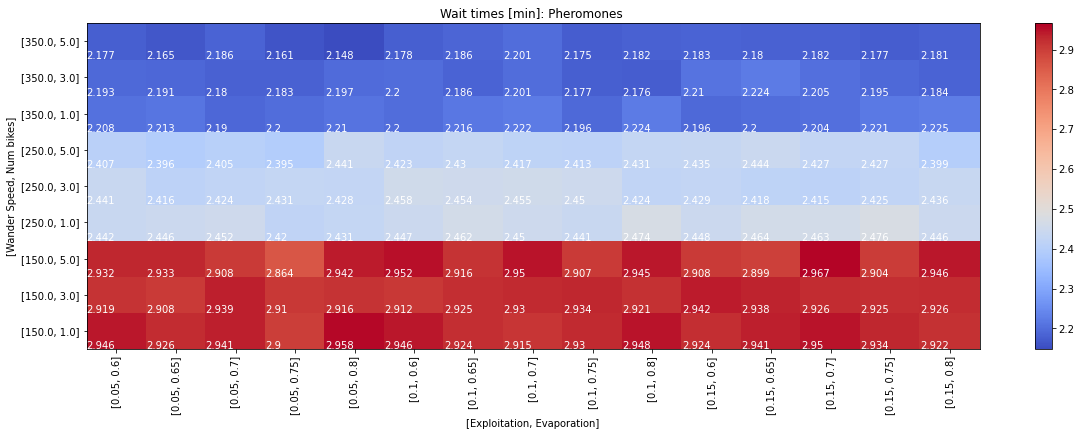

In [59]:
#### FIGURE 1: WAIT TIMES PHEROMONES

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  wait_matrix_p, cmap=shifted_cmap_wait_p)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( wait_matrix_p[i,j],3), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('Wait times [min]: Pheromones ')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


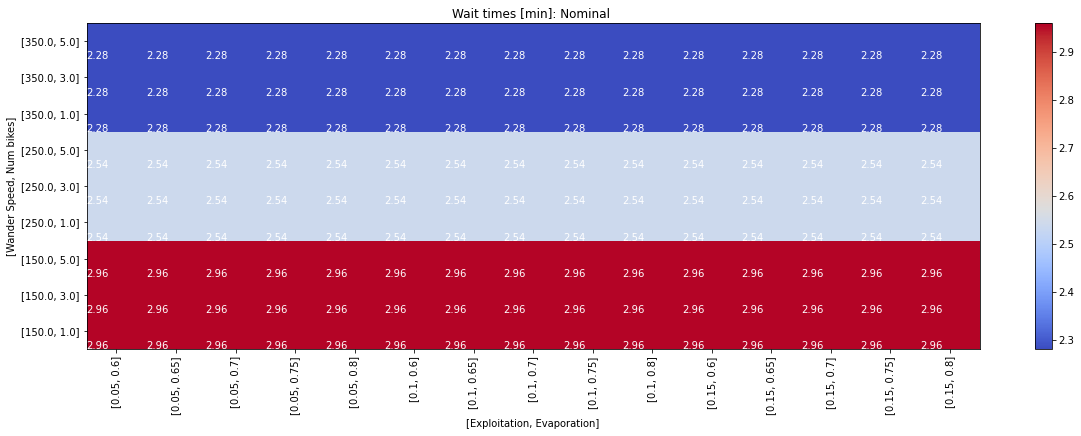

In [60]:
#### FIGURE 1: WAIT TIMES NOMINAL

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  wait_matrix_n, cmap=shifted_cmap_wait_n)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( wait_matrix_n[i,j],3), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('Wait times [min]: Nominal ')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


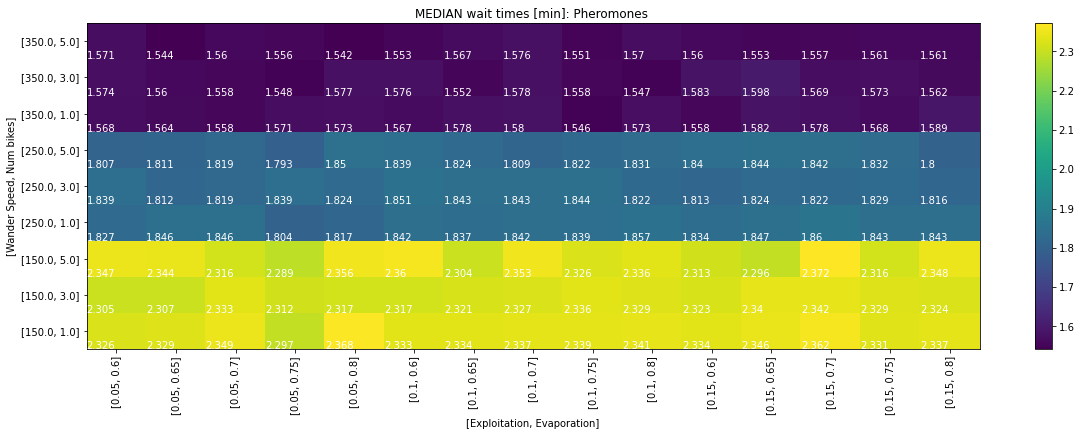

In [61]:
#### FIGURE 2; Median WAIT TIMES PHEROMONES

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  waitm_matrix_p)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( waitm_matrix_p[i,j],3), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('MEDIAN wait times [min]: Pheromones ')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


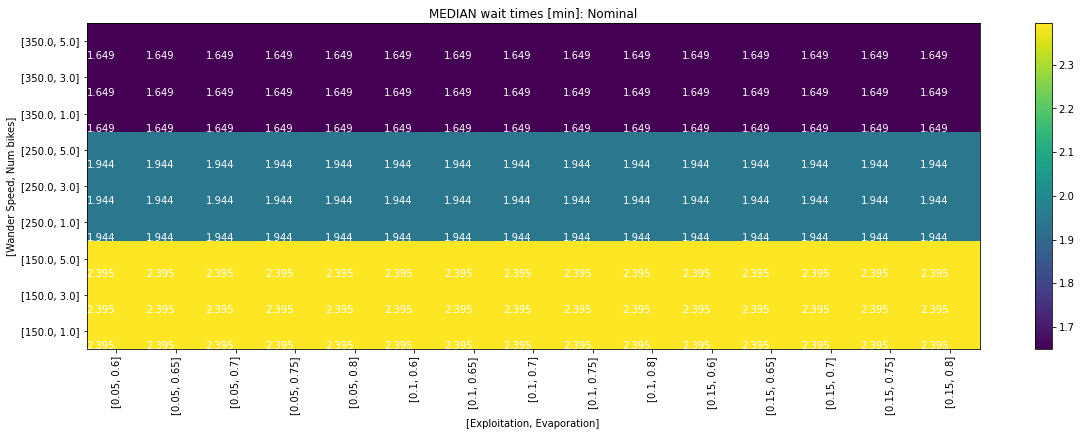

In [62]:
#### FIGURE 2; Median WAIT TIMES NOMINAL

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  waitm_matrix_n)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( waitm_matrix_n[i,j],3), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('MEDIAN wait times [min]: Nominal')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


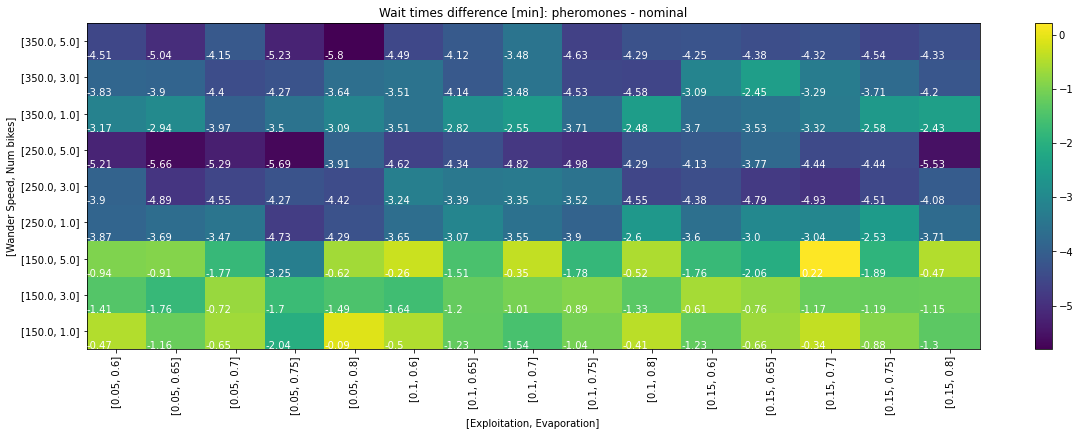

In [70]:
#### FIGURE 3: WAIT TIMES DIFFERENCE P-N

fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, wait_matrix_p_n)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(wait_matrix_p_n[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('Wait times difference [min]: pheromones - nominal')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


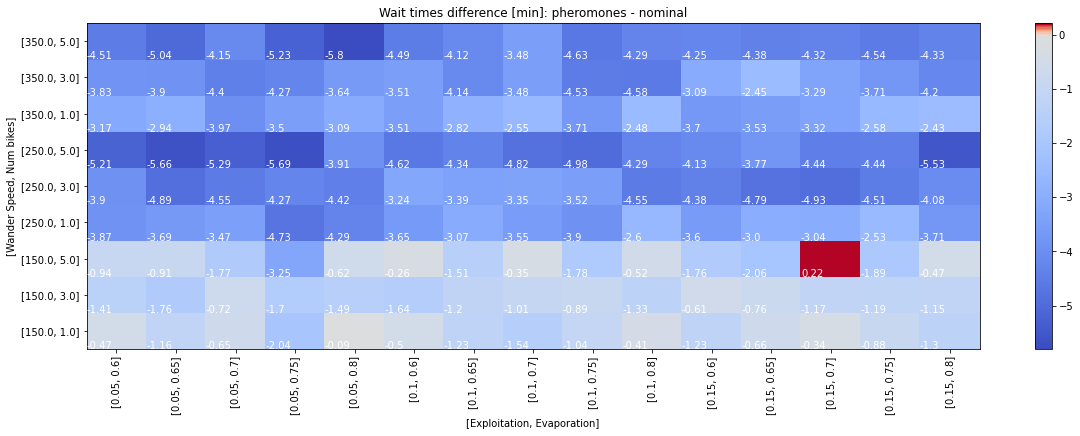

In [65]:
#### FIGURE 3: WAIT TIMES DIFFERENCE P-N

fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, wait_matrix_p_n, cmap=shifted_cmap_wait_p_n)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(wait_matrix_p_n[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('Wait times difference [min]: pheromones - nominal')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


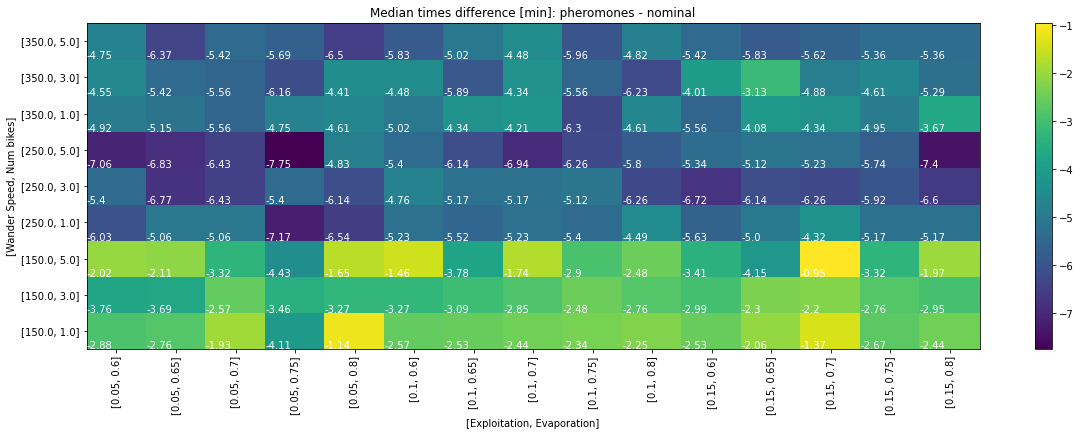

In [66]:
#### FIGURE 4: MEDIAN WAIT TIMES DIFFERENCE P-N

fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, waitm_matrix_p_n)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(waitm_matrix_p_n[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('Median times difference [min]: pheromones - nominal')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


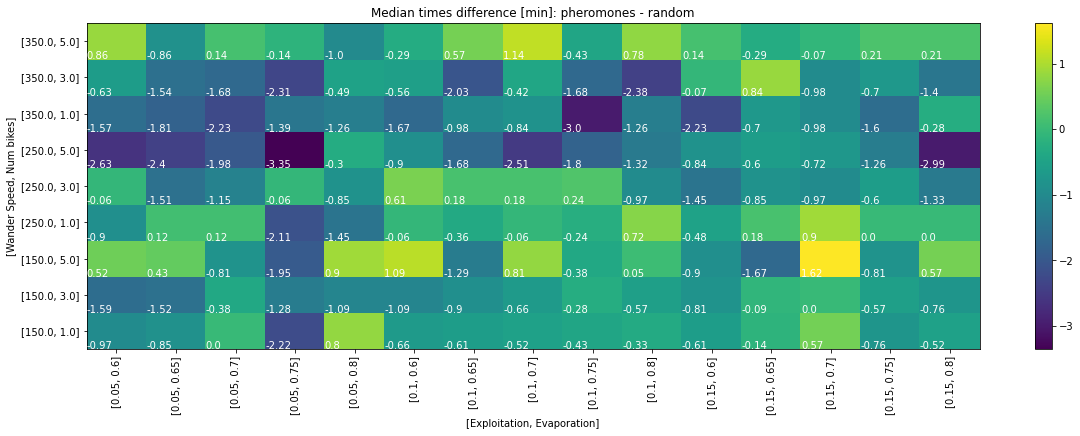

In [71]:
#### FIGURE 4: MEDIAN WAIT TIMES DIFFERENCE P-R

fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, waitm_matrix_p_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(waitm_matrix_p_r[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('Median times difference [min]: pheromones - random')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


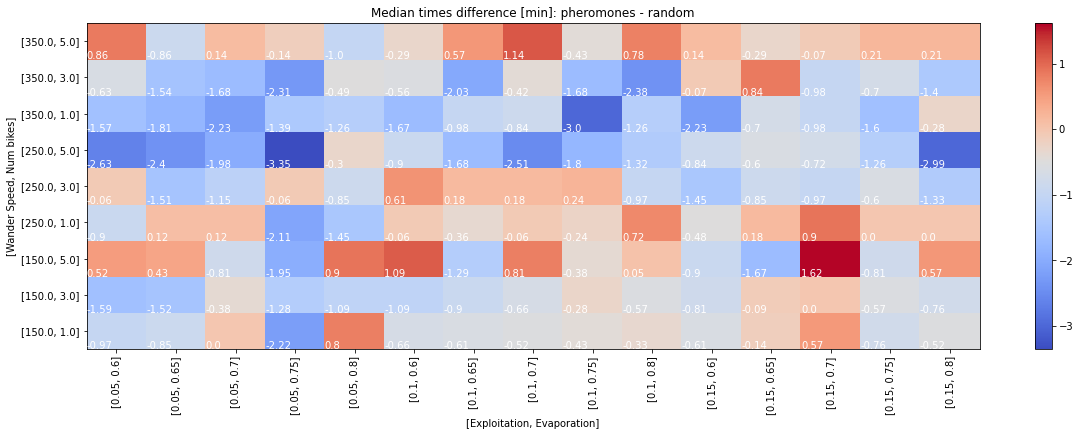

In [68]:
#### FIGURE 4: MEDIAN WAIT TIMES DIFFERENCE P-R

fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, waitm_matrix_p_r, cmap=shifted_cmap_wait_p_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(waitm_matrix_p_r[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('Median times difference [min]: pheromones - random')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


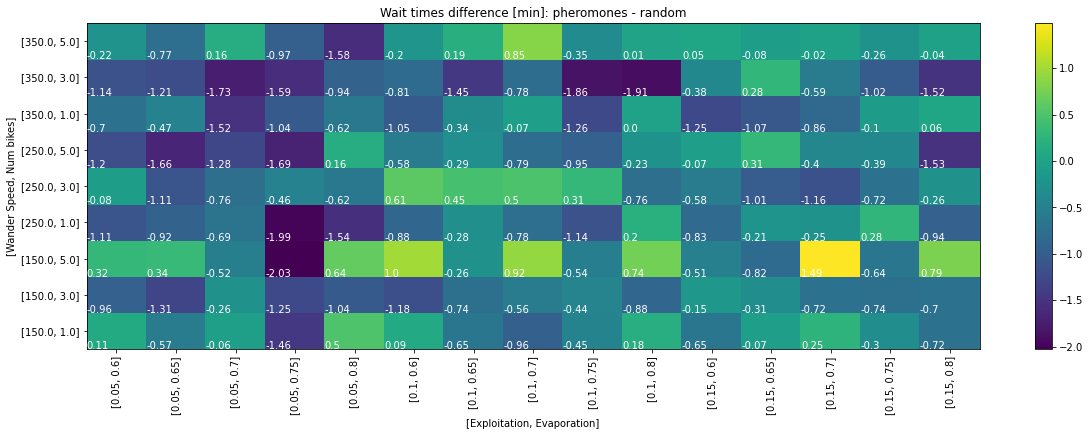

In [69]:
#### FIGURE 5: WAIT TIMES DIFFERENCE P-R

fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, wait_matrix_p_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(wait_matrix_p_r[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('Wait times difference [min]: pheromones - random')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


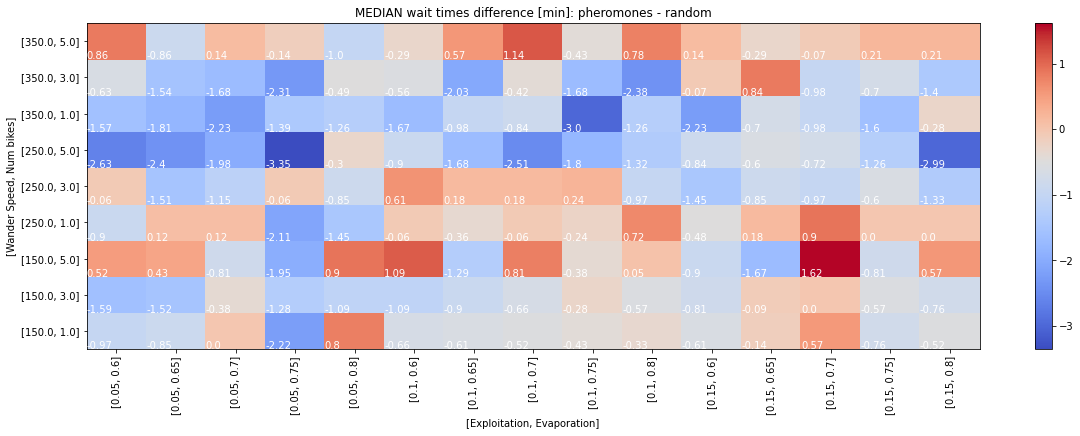

In [72]:
#### FIGURE 6: MEDIAN WAIT TIMES DIFFERENCE P-R

fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, waitm_matrix_p_r, cmap=shifted_cmap_wait_p_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(waitm_matrix_p_r[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('MEDIAN wait times difference [min]: pheromones - random')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


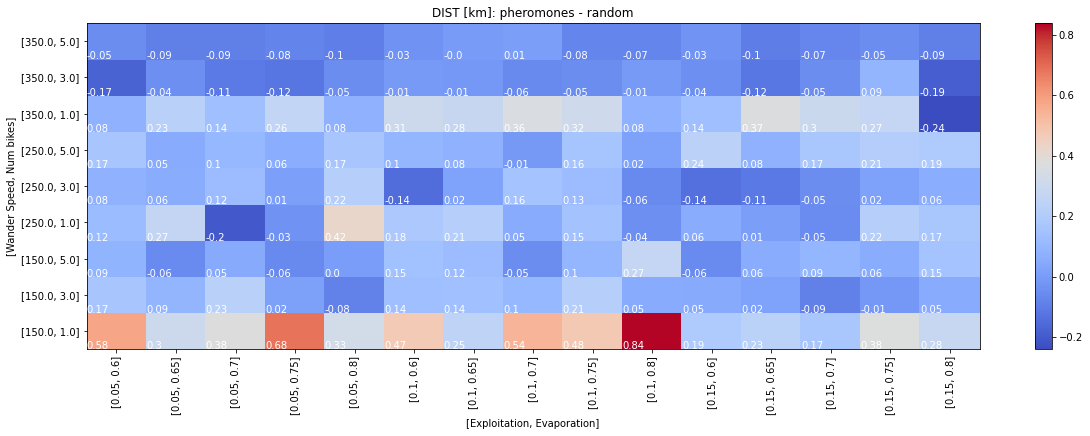

In [73]:
#### FIGURE 7: DISTANCES P_ R

fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, dist_matrix_p_r, cmap=shifted_cmap_wait_p_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(dist_matrix_p_r[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('DIST [km]: pheromones - random')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


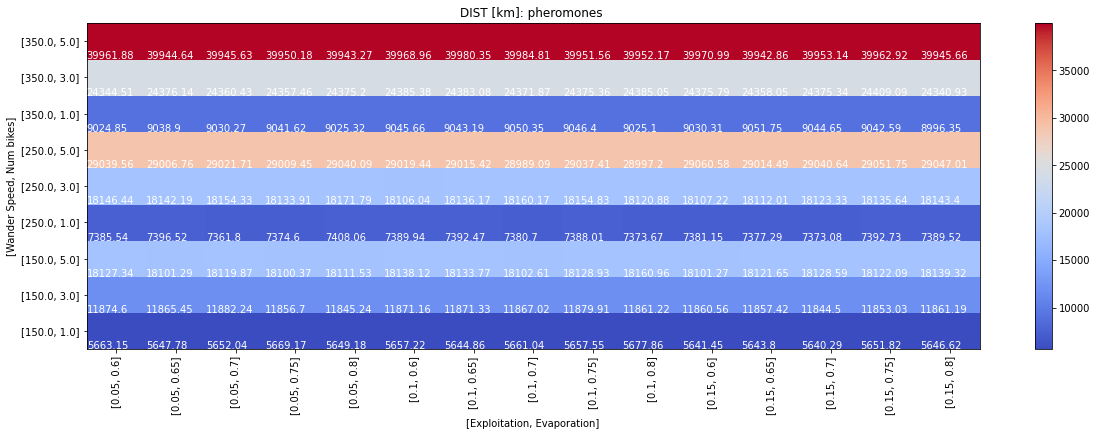

In [74]:
#### FIGURE 7: DISTANCES P
fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, dist_matrix_p, cmap=shifted_cmap_wait_p_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(dist_matrix_p[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('DIST [km]: pheromones ')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


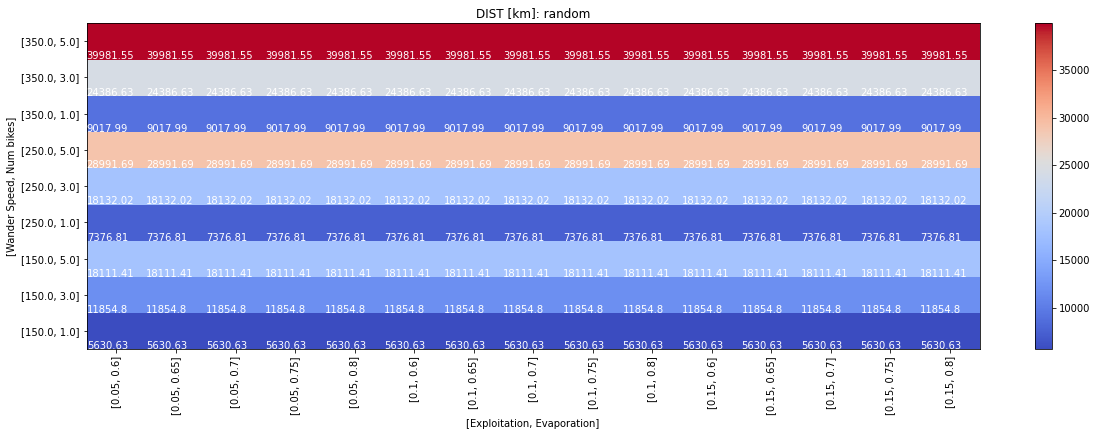

In [75]:
#### FIGURE 7: DISTANCES R
fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, dist_matrix_r, cmap=shifted_cmap_wait_p_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(dist_matrix_r[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('DIST [km]: random')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


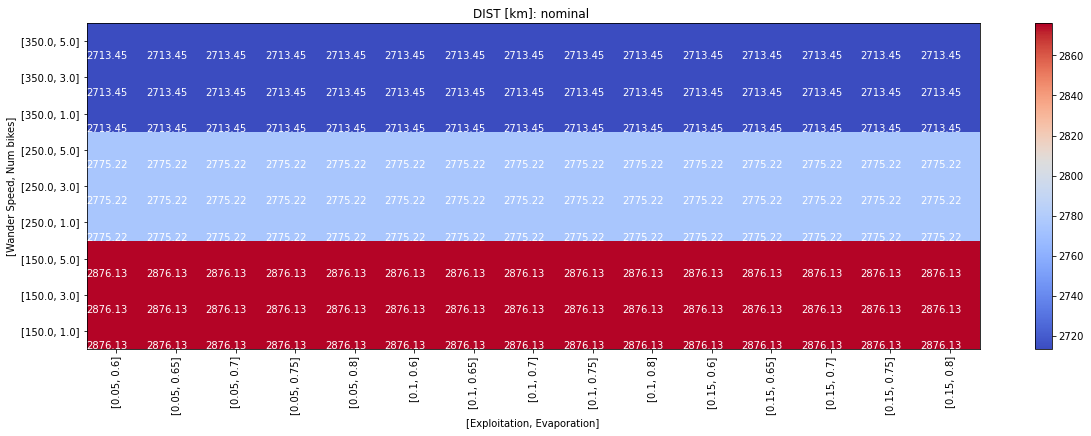

In [76]:
#### FIGURE 7: DISTANCES N
fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, dist_matrix_n, cmap=shifted_cmap_wait_p_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(dist_matrix_n[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('DIST [km]: nominal ')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


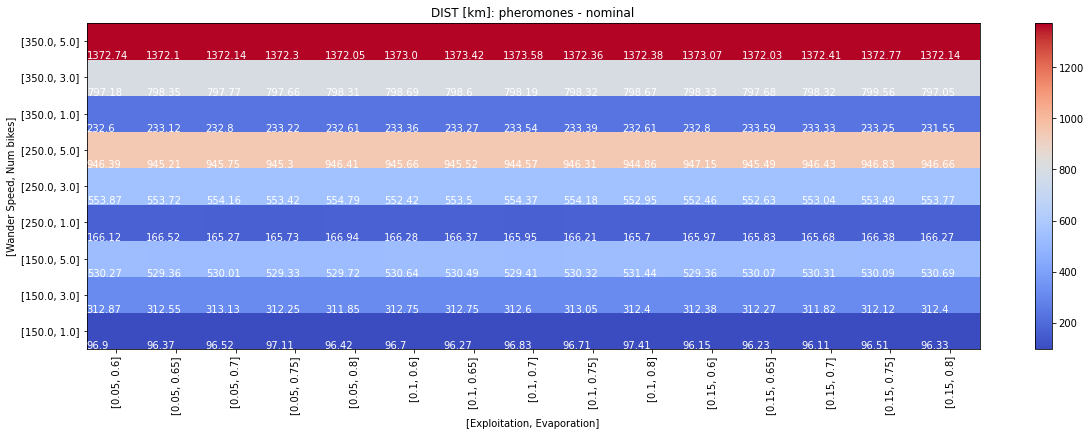

In [77]:
#### FIGURE 7: DISTANCES P_ N

fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, dist_matrix_p_n, cmap=shifted_cmap_wait_p_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(dist_matrix_p_n[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('DIST [km]: pheromones - nominal')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


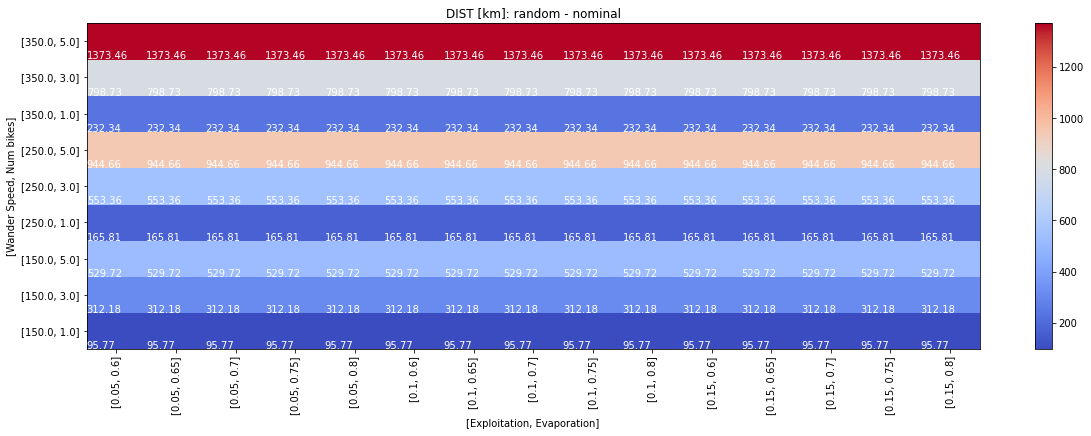

In [78]:
#### FIGURE 7: DISTANCES R_ N

fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, dist_matrix_r_n, cmap=shifted_cmap_wait_p_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(dist_matrix_r_n[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('DIST [km]: random - nominal')
fig.set_size_inches(20, 6)
fig.show()

## Mix stat with results

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
#Dummy vars for categorical data
user_p['Pheromones']=1
#user_n['Pheromones']=0
user_r['Pheromones']=0

In [ ]:
wait_matrix_p_r_5 = np.zeros((x_size,y_size))
wait_matrix_p_r_10 = np.zeros((x_size,y_size))
stat_matrix_p=np.zeros((x_size,y_size))
stat_matrix_ci=np.zeros((x_size,y_size))
stat_matrix_ci=stat_matrix_ci.astype(object)
stat_matrix_coef=np.zeros((x_size,y_size))

In [ ]:
# Loop to fill in the matrices 

u=-1

for i in range(i_size):

    for j in range(j_size):
        v=0
        u+=1
        for k in range(k_size):
            
            for l in range(l_size):

                #Read values and filter dataframe
                n_bikes=n_bikes_possible[i]
                wander_speed=wander_speed_possible[j]
                evaporation=evaporation_possible[l]
                exploitation=exploitation_possible[k]
                #print(n_bikes,wander_speed,evaporation,exploitation)

                #PHEROMONES#
                temp=user_p.loc[(user_p['Num Bikes']==n_bikes)&(user_p['Wandering Speed']==wander_speed)&(user_p['Evaporation']==evaporation)&(user_p['Exploitation']==exploitation)]
                #Compute aveage wait 
                sum=temp['Wait Time (min)'].sum()
                len=temp['Wait Time (min)'].size
                average_wait_p=sum/len
                median_wait_p=statistics.median(temp['Wait Time (min)'])
                #Compute average percentage of served trips
                count_served=temp.loc[temp['Trip Served']==True].shape[0]
                count_unserved=temp.loc[temp['Trip Served']==False].shape[0]
                average_served_p=(count_served)/(count_served+count_unserved)*100

                #NOMINAL
                temp_n=user_n.loc[(user_n['Num Bikes']==n_bikes)]
                #Compute aveage wait 
                sum_n=temp_n['Wait Time (min)'].sum()
                len_n=temp_n['Wait Time (min)'].size
                average_wait_n=sum_n/len_n
                median_wait_n=statistics.median(temp_n['Wait Time (min)'])
                #Compute average percentage of served trips
                count_served_n=temp_n.loc[temp_n['Trip Served']==True].shape[0]
                count_unserved_n=temp_n.loc[temp_n['Trip Served']==False].shape[0]
                average_served_n=(count_served_n)/(count_served_n+count_unserved_n)*100

                #RANDOM
                temp_r=user_r.loc[(user_r['Num Bikes']==n_bikes)&(user_r['Wandering Speed']==wander_speed)]
                #Compute aveage wait 
                sum_r=temp_r['Wait Time (min)'].sum()
                len_r=temp_r['Wait Time (min)'].size
                average_wait_r=sum_r/len_r
                median_wait_r=statistics.median(temp_r['Wait Time (min)'])
                #Compute average percentage of served trips
                count_served_r=temp_r.loc[temp_r['Trip Served']==True].shape[0]
                count_unserved_r=temp_r.loc[temp_r['Trip Served']==False].shape[0]
                average_served_r=(count_served_r)/(count_served_r+count_unserved_r)*100

                #SAVE DATA
                wait_matrix_p[u,v]=average_wait_p
                wait2_matrix_p[u,v]=median_wait_p
                served_matrix_p[u,v]=average_served_p
                wait_matrix_n[u,v]=average_wait_n 
                wait2_matrix_n[u,v]=median_wait_n
                served_matrix_n[u,v]=average_served_n
                wait_matrix_r[u,v]=average_wait_r
                wait2_matrix_r[u,v]=median_wait_r 
                served_matrix_r[u,v]=average_served_r




                #Concat
                user_conc= pd.concat([temp,temp_r])

                X = user_conc['Pheromones'] #'Wandering'
                y = user_conc['Wait Time (min)']
                X = sm.add_constant(X)
                est = sm.OLS(y, X).fit()
                est_coef=est.params[1]
                #print(est_coef)
                est_p = est.pvalues[1]
                est_ci= est.conf_int()
                #print(est_ci.iloc[1,0],est_ci.iloc[1,1] )
                a= est_ci.iloc[1,0]
                b= est_ci.iloc[1,1]

                ci= [a,b]

                #SAVE DATA
                stat_matrix_p[u,v]= est_p
                stat_matrix_ci[u,v]= ci
                stat_matrix_coef[u,v]= est_coef

                #SAVE DATA
                wait_matrix_p_n[u,v]=(average_wait_p - average_wait_n)/average_wait_n*100
                wait2_matrix_p_n[u,v]=(median_wait_p - median_wait_n)/median_wait_n*100
                served_matrix_p_n[u,v]=(average_served_p - average_served_n)/average_served_n*100
                wait_matrix_p_r[u,v]=(average_wait_p - average_wait_r)/average_wait_r*100 
                wait2_matrix_p_r[u,v]=(median_wait_p - median_wait_r)/median_wait_r*100
                served_matrix_p_r[u,v]=(average_served_p - average_served_r)/average_served_r*100
                wait_matrix_r_n[u,v]=(average_wait_r - average_wait_n)/average_wait_n*100
                wait2_matrix_r_n[u,v]=(median_wait_r - median_wait_n)/median_wait_n*100
                served_matrix_r_n[u,v]=(average_served_r - average_served_n)/average_served_n*100
                
                if est_p > 0.05:
                  wait_matrix_p_r_5[u,v]= np.NaN


                if est_p > 0.10:
                  wait_matrix_p_r_10[u,v]= np.NaN
                  stat_matrix_coef[u,v]= np.NaN



                v+=1
                

In [ ]:
#Process the labels for the combined axis
labels_1= []
for i in range(i_size):
    for j in range(j_size):
        labels_1.append([n_bikes_possible[i],wander_speed_possible[j]])

labels_2 =[]

for k in range(k_size):
    for l in range(l_size):
        labels_2.append([exploitation_possible[k],evaporation_possible[l]])

#Create grid
yi = np.arange(0, x_size+1) #shift x and y
xi = np.arange(0, y_size+1)
X, Y = np.meshgrid(xi, yi)

In [ ]:
#### FIGURE 9: WAIT TIMES DIFFERENCE P-R

fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, wait_matrix_p_r_5,cmap=shifted_cmap_wait_p_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(wait_matrix_p_r_5[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('Wait times difference [min]: pheromones - random')
fig.set_size_inches(20, 6)
fig.show()

In [ ]:
#### FIGURE 9: WAIT TIMES DIFFERENCE P-R

fig = matplotlib.pyplot.gcf()
plt.pcolormesh(X, Y, wait_matrix_p_r_10,cmap=shifted_cmap_wait_p_r)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round(wait_matrix_p_r_10[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('Wait times difference [min]: pheromones - random')
fig.set_size_inches(20, 6)
fig.show()

In [ ]:
#### FIGURE 1: COEF > 10

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  stat_matrix_coef)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( stat_matrix_coef[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('Coef')
fig.set_size_inches(20, 6)
fig.show()

In [ ]:
#### FIGURE 1: P VALUES

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  stat_matrix_p)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( stat_matrix_p[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Wander Speed, Num bikes]")
plt.title('Pheromone p-values ')
fig.set_size_inches(20, 6)
fig.show()

# Plots for paper


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


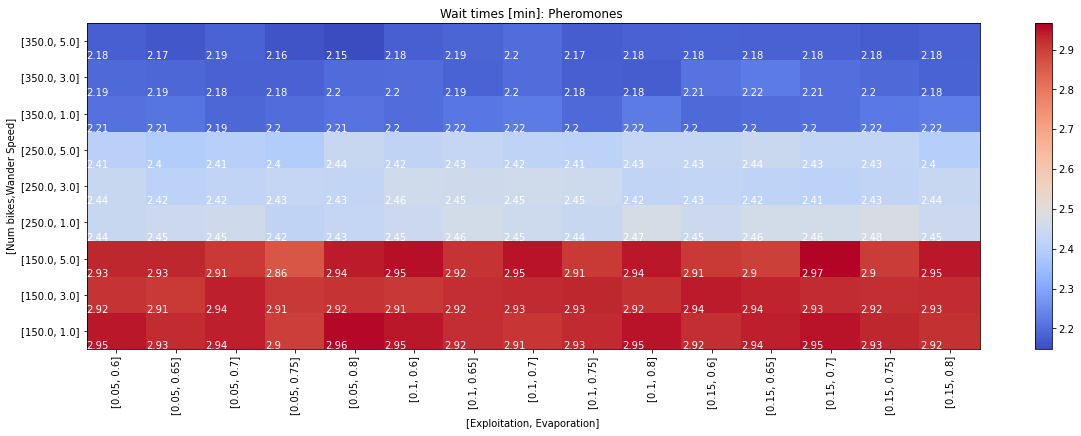

In [79]:
#### FIGURE 1: WAIT TIMES PHEROMONES

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  wait_matrix_p,cmap=shifted_cmap_wait_p)
for i in range(x_size):
    for j in range(y_size):
        plt.text(j,i, round( wait_matrix_p[i,j],2), color="w")
plt.colorbar()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel("[Exploitation, Evaporation]")
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel("[Num bikes,Wander Speed]")
plt.title('Wait times [min]: Pheromones ')
fig.set_size_inches(20, 6)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


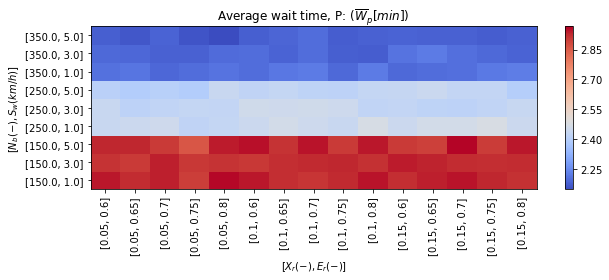

In [80]:
#### FIGURE 1: WAIT TIMES PHEROMONES

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  wait_matrix_p,cmap=shifted_cmap_wait_p)
cb = plt.colorbar()
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel(r'$[X_r(-),E_r(-)]$')
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel(r'$[N_b(-),S_w(km/h)]$')
plt.title(r'Average wait time, P: ($\overline{W}_p [min]$)')
fig.set_size_inches(10, 3)
fig.show()


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


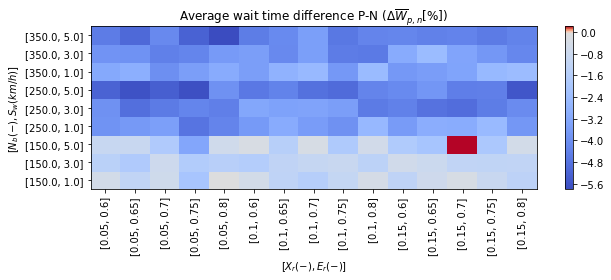

In [81]:
#### FIGURE 1: WAIT TIMES PHEROMONES - Nominal

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  wait_matrix_p_n, cmap=shifted_cmap_wait_p_n)
cb = plt.colorbar()
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel(r'$[X_r(-),E_r(-)]$')
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel(r'$[N_b(-),S_w(km/h)]$')
plt.title(r'Average wait time difference P-N ($\Delta \overline{W}_{p,n}[\%]$)')
fig.set_size_inches(10, 3)
fig.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


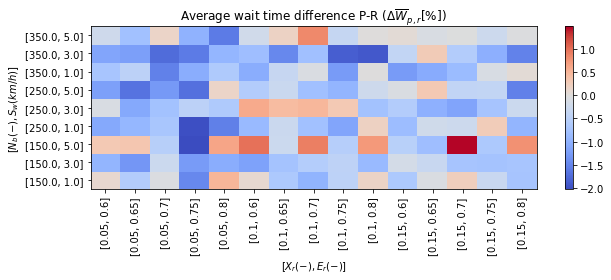

In [82]:
#### FIGURE 1: WAIT TIMES PHEROMONES - Random

fig = matplotlib.pyplot.gcf()

plt.pcolormesh(X, Y,  wait_matrix_p_r,cmap=shifted_cmap_wait_p_r)
cb = plt.colorbar()
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()
plt.xticks(xi[:-1]+0.5, labels_2, rotation=90)
plt.xlabel(r'$[X_r(-),E_r(-)]$')
plt.yticks(yi[:-1]+0.5, labels_1)
plt.ylabel(r'$[N_b(-),S_w(km/h)]$')
plt.title(r'Average wait time difference P-R ($\Delta \overline{W}_{p,r}[\%]$)')
fig.set_size_inches(10, 3)
fig.show()

# Table for paper

In [ ]:
#Best scenarios

a_300=[300,1,0.05,0.6]
b_300=[300,3,0.1,0.65]
c_300=[300,5,0.1,0.65]

a_900=[900,1,0.3,0.8]
b_900=[900,3,0.2,0.65]
c_900=[900,5,0.2,0.75]

a_1500=[1500,1,0.25,0.75]
b_1500=[1500,3,0.25,0.65]
c_1500=[1500,5,0.3,0.6]

values=[a_300,b_300,c_300,a_900,b_900,c_900,a_1500,b_1500,c_1500]

In [ ]:
results= pd.DataFrame(columns = ['Num Bikes', 'Wandering Speed', 'Evaporation','Exploitation','Average Wait','Improve (P-N)','Improve (P-R)','Distance Increase'])

In [ ]:
#Get the data for those paremeters

for i in values:
  n_bikes=i[0]
  wander_speed=i[1]
  evaporation= i[2]
  exploitation= i[3]

  #PHEROMONES#
  temp=user_p.loc[(user_p['Num Bikes']==n_bikes)&(user_p['Wandering Speed']==wander_speed)&(user_p['Evaporation']==evaporation)&(user_p['Exploitation']==exploitation)]
  #Compute aveage wait 
  sum=temp['Wait Time (min)'].sum()
  len=temp['Wait Time (min)'].size
  average_wait_p=sum/len
  median_wait_p=statistics.median(temp['Wait Time (min)'])
  #Compute average percentage of served trips
  count_served=temp.loc[temp['Trip Served']==True].shape[0]
  count_unserved=temp.loc[temp['Trip Served']==False].shape[0]
  average_served_p=(count_served)/(count_served+count_unserved)*100
  #Compute distances
  temp=bike_p.loc[(bike_p['Num Bikes']==n_bikes)&(bike_p['Wandering Speed']==wander_speed)&(bike_p['Evaporation']==evaporation)&(bike_p['Exploitation']==exploitation)]
  total_dist_p=temp['Distance Traveled'].sum()/1000

  #NOMINAL
  temp_n=user_n.loc[(user_n['Num Bikes']==n_bikes)]
  #Compute aveage wait 
  sum_n=temp_n['Wait Time (min)'].sum()
  len_n=temp_n['Wait Time (min)'].size
  average_wait_n=sum_n/len_n
  median_wait_n=statistics.median(temp_n['Wait Time (min)'])
  #Compute average percentage of served trips
  count_served_n=temp_n.loc[temp_n['Trip Served']==True].shape[0]
  count_unserved_n=temp_n.loc[temp_n['Trip Served']==False].shape[0]
  average_served_n=(count_served_n)/(count_served_n+count_unserved_n)*100
  #Compute distances
  temp_n=bike_n.loc[(bike_n['Num Bikes']==n_bikes)]
  total_dist_n=temp_n['Distance Traveled'].sum()/1000

  #RANDOM
  temp_r=user_r.loc[(user_r['Num Bikes']==n_bikes)&(user_r['Wandering Speed']==wander_speed)]
  #Compute aveage wait 
  sum_r=temp_r['Wait Time (min)'].sum()
  len_r=temp_r['Wait Time (min)'].size
  average_wait_r=sum_r/len_r
  median_wait_r=statistics.median(temp_r['Wait Time (min)'])
  #Compute average percentage of served trips
  count_served_r=temp_r.loc[temp_r['Trip Served']==True].shape[0]
  count_unserved_r=temp_r.loc[temp_r['Trip Served']==False].shape[0]
  average_served_r=(count_served_r)/(count_served_r+count_unserved_r)*100
  #Compute distances
  temp_r=bike_r.loc[(bike_r['Num Bikes']==n_bikes)&(bike_r['Wandering Speed']==wander_speed)]
  total_dist_r=temp_r['Distance Traveled'].sum()/1000

  #% Improvement 
  improv_p_n= ((average_wait_p-average_wait_n)/average_wait_n)*100
  improv_p_r= ((average_wait_p-average_wait_r)/average_wait_r)*100

  # Dist increase (times fold)
  dist_incr= total_dist_p/total_dist_n

  #SAVE RESULTS
  #data=pd.DataFrame()
  #data=[n_bikes, wander_speed, evaporation, exploitation, average_wait_p, improv_p_n, improv_p_r, dist_incr]
  #print(data)
  results=results.append({'Num Bikes': n_bikes, 'Wandering Speed':wander_speed , 'Evaporation':evaporation ,'Exploitation': exploitation,'Average Wait': average_wait_p,'Improve (P-N)':improv_p_n,'Improve (P-R)':improv_p_r,'Distance Increase':dist_incr}, ignore_index=True)

In [ ]:
results

In [ ]:
from google.colab import files
results.to_csv('output_batch.csv')
files.download('output_batch.csv')